In [2]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

#load the statistical libraries
from statsmodels.stats import diagnostic
from scipy import stats

In [3]:
df = pd.read_csv('../Data/us_census_2015.csv')
df['WhiteMinority'] = (df['White'] < 50).apply(int)
df.sample(3)

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,WhiteMinority
1292,26123,Michigan,Newaygo,48029,24156,23873,5.7,90.6,1.4,0.6,...,2.1,3.4,29.2,18619,81.7,11.3,6.6,0.3,10.1,0
1007,21029,Kentucky,Bullitt,76961,38049,38912,1.6,95.3,0.5,0.2,...,0.7,2.6,27.5,37079,84.6,10.9,4.4,0.1,7.6,0
912,20049,Kansas,Elk,2683,1339,1344,3.8,91.5,0.8,1.7,...,2.6,8.9,25.3,1121,59.2,26.6,13.6,0.5,5.3,0


In [4]:
numeric_features = df.columns[3:-1]
df_norm = df.copy()
df_norm[numeric_features] = (df_norm[numeric_features] - df_norm[numeric_features].mean()) / df_norm[numeric_features].std()
races = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']

## Correlation between two Variables

The **pearson correlation** measures the strength(absolute value) and the direction(positive/negative) of the **linear** correlation between two normally distributed variables. The p-value returned by the scipy.stats method gives the probability that an uncorrelated system would give a pearson correlation of that amplitude or higher.  
The **spearman's rank coefficient correlation** assesses how well a monotonic function could describe the relationship between two variables. It is less prune to outliers than the pearson correlation. P value gives the probability of an uncorrelated dataset giving at least the same spearman correlation than the underlying data.  
A **T-Test** is a two-sided test for the null hypothesis that two distributions have equal mean.

In [5]:
corr_p, p_p = stats.pearsonr(df.Black, df.Unemployment)
corr_s, p_s = stats.spearmanr(df.Black, df.Unemployment)
t, p_t = stats.ttest_ind(df.Men, df.Women)
print(f"The pearson coefficient is {corr_p:.3f} with a p-value of {p_p:.4f}.")
print(f"The spearman coefficient is {corr_s:.3f} with a p-value of {p_s:.4f}.")
print(f"The p-value for the ttest is {p_t:.4f}.")

The pearson coefficient is 0.353 with a p-value of 0.0000.
The spearman coefficient is 0.337 with a p-value of 0.0000.
The p-value for the ttest is 0.6848.


## Does a variable come from a certain distribution?

In [6]:
_, p_n = diagnostic.kstest_normal(df.Hispanic, dist='norm')
_, p_e = diagnostic.kstest_normal(df.Hispanic, dist='exp')
print(f"The p values for the following null hypotheses are:\nUnderlying distribution is normal: {p_n:.4f}\nUnderlying distribution is exponential: {p_e:.4f}")

The p values for the following null hypotheses are:
Underlying distribution is normal: 0.0010
Underlying distribution is exponential: 0.0010


## Observing Multiple Variables at the same time, Regression

### Statsmodels Regression analysis with the formulas API
- Equations are specified using patsy formula syntax. Important operators are:
    1. `~` : Separates the left-hand side and right-hand side of a formula.
    2. `+` : Creates a union of terms that are included in the model.
    3. `:` : Interaction term.
    3. `*` : `a * b` is short-hand for `a + b + a:b`, and is useful for the common case of wanting to include all interactions between a set of variables.
    - `Categorical` variables can be included as C(Variable). 
- The results include:
    1. `No. Observations` : Sample Size
    2. `R-squared` : The fraction of explained variance.
    3. For each predictor: coefficient, standard error of the coefficients, p-value, 95% confidence intervals  

OLS: `Predicted Variable ~ Intercept + Sum(Coef*Predictor)`  
LOG: `Predicted Variable ~ exp(Intercept + Sum(Coef*Predictor)`, $y_i = e^{b_0 + b_1 X_{i1} + ... + \epsilon_i}$, if $b_0 \approx 0$, then an increase of 1 in predictor $X_i$ leads to a realitve increase for $y_i$ of $e^{b_i}$

In [58]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
# 1. Declare a Model
mod = smf.logit(formula='WhiteMinority ~ Black + SelfEmployed', data=df)  # Logistic Regression
mod = smf.ols(formula='Unemployment ~ Black + SelfEmployed', data=df)  # Ordinary least squares
# 2. Fit
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.352991
         Iterations 6
                            OLS Regression Results                            
Dep. Variable:           Unemployment   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     312.8
Date:                Thu, 07 Jan 2021   Prob (F-statistic):          7.50e-125
Time:                        11:12:47   Log-Likelihood:                -8822.7
No. Observations:                3220   AIC:                         1.765e+04
Df Residuals:                    3217   BIC:                         1.767e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

### Statsmodels Regression analysis with the basic API

In [19]:
X = df[['Black', 'SelfEmployed']]
X = sm.add_constant(X) # Or else, there will be no intercept/constant
y = df.Unemployment
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           Unemployment   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     312.8
Date:                Thu, 07 Jan 2021   Prob (F-statistic):          7.50e-125
Time:                        10:23:03   Log-Likelihood:                -8822.7
No. Observations:                3220   AIC:                         1.765e+04
Df Residuals:                    3217   BIC:                         1.767e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            9.0840      0.172     52.871   

### Scikit-learn Regression analysis

In [23]:
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
X = df[['Black', 'SelfEmployed']]
y = df.Unemployment
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print("Coefficients: {:.4f} and {:.4f}. Intercept: {:.4f}".format(*lin_reg.coef_, lin_reg.intercept_))

Coefficients: 0.0831 and -0.2155. Intercept: 9.0840


#### Cross Value Prediction, Scikit

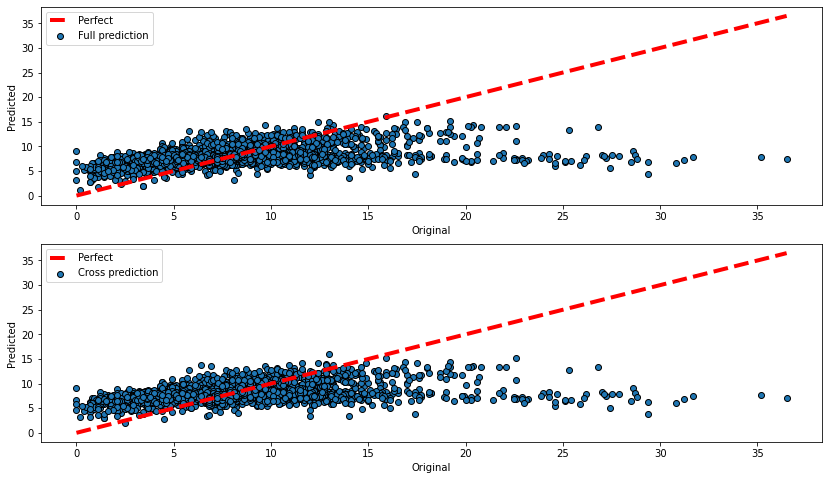

In [50]:
from sklearn.model_selection import cross_val_predict
lr = LinearRegression()
ridge = Ridge(alpha=20)
pred = lin_reg.predict(X)
x_pred = cross_val_predict(lr, X, y, cv=3)
r_pred = cross_val_predict(ridge, X, y, cv=5)

fig, axs = plt.subplots(nrows=2, figsize=(14, 8), sharey=True)
axs[0].scatter(y, pred, edgecolors=(0, 0, 0), label='Full prediction')
axs[1].scatter(y, x_pred, edgecolors=(0, 0, 0), label='Cross prediction')
# axs[2].scatter(y, r_pred, edgecolors=(0, 0, 0), label='Ridge Cross')
for ax in axs:
    ax.plot([min(y), max(y)], [min(y), max(y)], 'r--', lw=4, label='Perfect')
    ax.set_xlabel('Original')
    ax.set_ylabel('Predicted')
    ax.legend()
plt.show()

### Evaluate the predictions with sklearn

In [51]:
from sklearn.metrics import mean_squared_error, auc, roc_curve
print("MSE: {}".format(mean_squared_error(y, pred)))

MSE: 14.042389923368457


### Evaluate basic metrics for predictions

In [63]:
X = df[['Black', 'SelfEmployed']]
y = df.WhiteMinority
logreg = LogisticRegression()
pred = cross_val_predict(logreg, X, y)

In [68]:
def classification_terms(y, pred):
    # True Positive, True Negative, False Pasitive, False Negative
    y = np.asarray(y)
    pred = np.asarray(pred)
    assert len(y) == len(pred)
    total = len(y)
    TP = ((y==pred) * (pred==1)).sum()
    TN = ((y==pred) * (pred==0)).sum()
    FP = ((y!=pred) * (pred==1)).sum()
    FN = ((y!=pred) * (pred==0)).sum()
    assert TP+TN+FP+FN == len(y)
    return TP, TN, FP, FN

def classification_metrics(TP, TN, FP, FN, verbose=False):
    accuracy = (TP+TN) / (TP+TN+FP+FN)  # What fraction of my prediction is truthfull?
    precision = TP / (TP+FP) if TP+FP > 0 else np.nan  # What fraction of positive predictions is really positive?
    recall = TP / (TP+FN) if TP+FN > 0 else np.nan  # What fraction of positive conditions do I find? (sensitivity)
    negative_precision = TN / (TN+FN) if TN+FN > 0 else np.nan
    specifity = TN / (TN+FP) if TN+FP > 0 else np.nan # What fraction of negative conditions do I find? == negative recall
    f1 = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else np.nan # Harmonic mean of precision and recall
    f1_negative = 2 * (negative_precision * specifity) / (negative_precision + specifity) if negative_precision + specifity > 0 else np.nan # Harmonic mean of precision and recall
    if verbose:
        return accuracy, precision, recall, negative_precision, specifity, f1, f1_negative
    return accuracy, precision, recall, f1
    
metrics = classification_metrics(*classification_terms(y, pred))
metric_names = ['Accuracy', 'Precision', 'Recall', 'Specifity']
for name, metric in zip(metric_names, metrics):
    print("The {} is: {:.3f}".format(name, metric))

The Accuracy is: 0.887
The Precision is: 0.173
The Recall is: 0.987
The Specifity is: 0.294


## Match variables for comparison: Propensity Scores
Propensity Score $e(x)=Pr(Z=1|\textbf{x})$, the propability of "receiving a certain treatment", given the data that's known.  
This leads to $Pr\{\textbf{x}|Z=1, e(\textbf{x})\} = Pr\{\textbf{x}|Z=0, e(\textbf{x})\}$, meaning a matched pair (equal/similar score) must not have the same features x, but treated and control groups will have similar distributions of x.

In [72]:
# Calculate the propensity score of a binary outcome using logistic regression:
import statsmodels.api as sm
import statsmodels.formula.api as smf
features = [f for f in numeric_features if f not in races]
df_norm = df_norm.dropna()
X = df_norm[features]
X = sm.add_constant(X)  # This is necessary to include an intercept/constant which is done automatically in the formulat api
y = df_norm.WhiteMinority
logreg = sm.Logit(y, X).fit()
# Formula way:
# mod = smf.logit(formula='treat ~  age + educ + C(black) + C(hispan)  + C(married) + C(nodegree) + +re74 + re75', data=df).fit()

propensity_scores = logreg.predict(X)

Optimization terminated successfully.
         Current function value: 0.203839
         Iterations 11


Then, use any method desired to match similar propensity scores. For example the networkx library.

In [ ]:
import networkx as nx
df_norm['propensity'] = propensity_scores
G = nx.Graph()
control = df_norm.loc[df.WhiteMinority == 0]
test_group = df_norm.loc[df.WhiteMinority == 1]
ebunch = [[c, t, 1 - abs(c.propensity - t.propensity)] for _, c in control.iterrows() for _, t in test_group.iterrows()]
G.weighted_edges_from(ebunch)

In [ ]:
ebunch

In [ ]:
ll